In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importando e limpando os dados

In [64]:
df =  pd.read_csv("../data/votacao_secao_2022_SP.csv",  sep=';', encoding='latin1', quotechar='"')

In [65]:
df.isnull().sum()

DT_GERACAO                   0
HH_GERACAO                   0
ANO_ELEICAO                  0
CD_TIPO_ELEICAO              0
NM_TIPO_ELEICAO              0
NR_TURNO                     0
CD_ELEICAO                   0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
SG_UE                        0
NM_UE                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
CD_CARGO                     0
DS_CARGO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

In [66]:
df.isna().sum()

DT_GERACAO                   0
HH_GERACAO                   0
ANO_ELEICAO                  0
CD_TIPO_ELEICAO              0
NM_TIPO_ELEICAO              0
NR_TURNO                     0
CD_ELEICAO                   0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
SG_UE                        0
NM_UE                        0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
CD_CARGO                     0
DS_CARGO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

In [67]:
df.dtypes

DT_GERACAO                   object
HH_GERACAO                   object
ANO_ELEICAO                   int64
CD_TIPO_ELEICAO               int64
NM_TIPO_ELEICAO              object
NR_TURNO                      int64
CD_ELEICAO                    int64
DS_ELEICAO                   object
DT_ELEICAO                   object
TP_ABRANGENCIA               object
SG_UF                        object
SG_UE                        object
NM_UE                        object
CD_MUNICIPIO                  int64
NM_MUNICIPIO                 object
NR_ZONA                       int64
NR_SECAO                      int64
CD_CARGO                      int64
DS_CARGO                     object
NR_VOTAVEL                    int64
NM_VOTAVEL                   object
QT_VOTOS                      int64
NR_LOCAL_VOTACAO              int64
SQ_CANDIDATO                  int64
NM_LOCAL_VOTACAO             object
DS_LOCAL_VOTACAO_ENDERECO    object
dtype: object

In [68]:
df.shape

(18761482, 26)

In [70]:
votos_por_municipio = df.groupby('NM_MUNICIPIO')['QT_VOTOS'].sum().sort_values(ascending=False)


In [71]:
votos_por_candidato = df.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending=False)

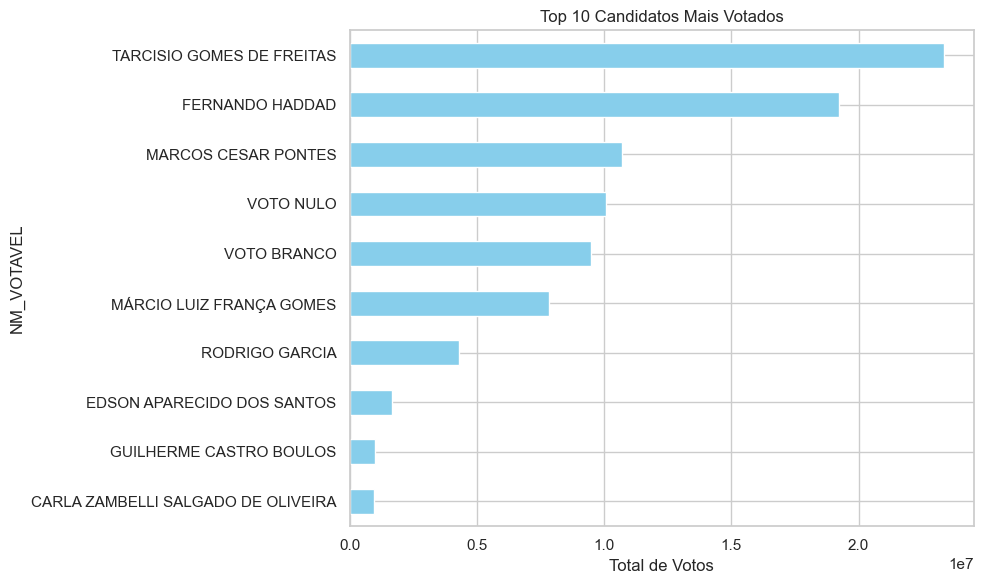

In [72]:
votos_por_candidato.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Candidatos Mais Votados")
plt.xlabel("Total de Votos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

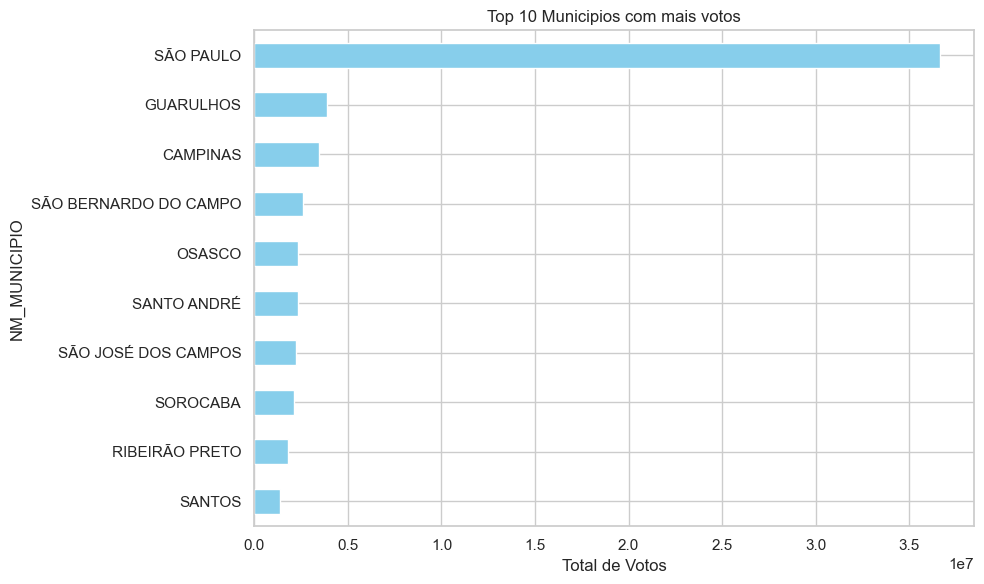

In [73]:
votos_por_municipio.head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Municipios com mais votos")
plt.xlabel("Total de Votos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

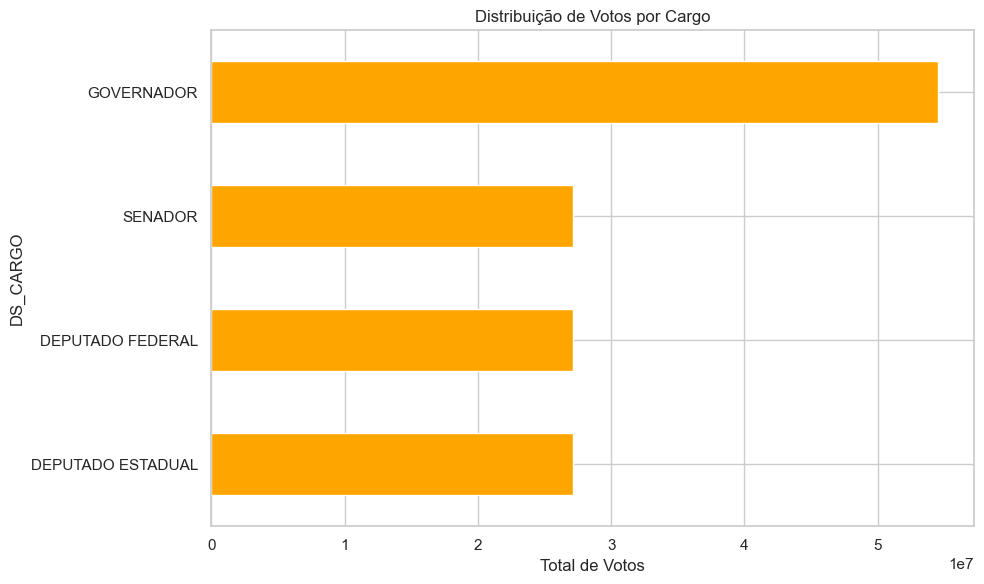

In [74]:
votos_cargo = df.groupby('DS_CARGO')['QT_VOTOS'].sum().sort_values()

votos_cargo.plot(kind='barh', figsize=(10, 6), color='orange')
plt.title("Distribuição de Votos por Cargo")
plt.xlabel("Total de Votos")
plt.tight_layout()
plt.show()

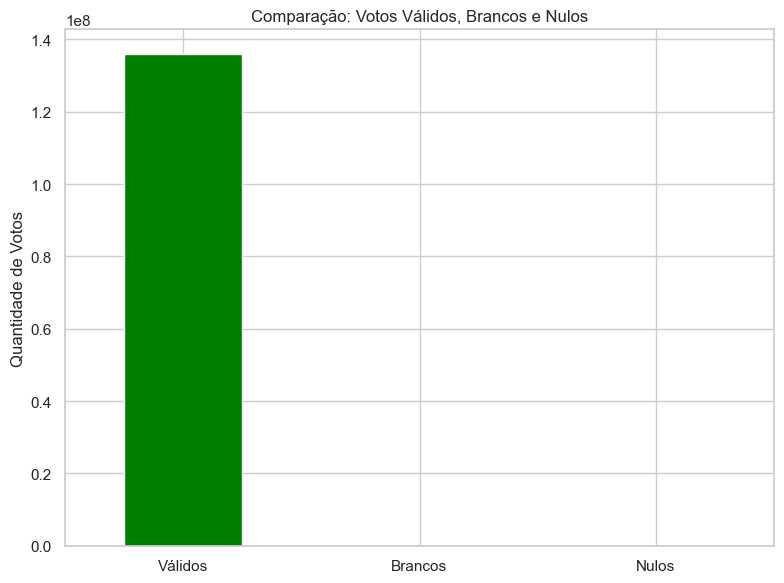

In [75]:
tipos_voto = df['NM_VOTAVEL'].copy()

cond_valido = ~tipos_voto.isin(["Voto em branco", "Voto nulo", "Voto anulado e apurado em separado"])
cond_branco = tipos_voto == "Voto em branco"
cond_nulo = tipos_voto == "Voto nulo"

votos_validos = df[cond_valido]['QT_VOTOS'].sum()
votos_brancos = df[cond_branco]['QT_VOTOS'].sum()
votos_nulos = df[cond_nulo]['QT_VOTOS'].sum()

votos = pd.Series({
    "Válidos": votos_validos,
    "Brancos": votos_brancos,
    "Nulos": votos_nulos
})

sns.set(style="whitegrid")
votos.plot(kind='bar', color=['green', 'lightgray', 'red'], figsize=(8, 6))
plt.title("Comparação: Votos Válidos, Brancos e Nulos")
plt.ylabel("Quantidade de Votos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

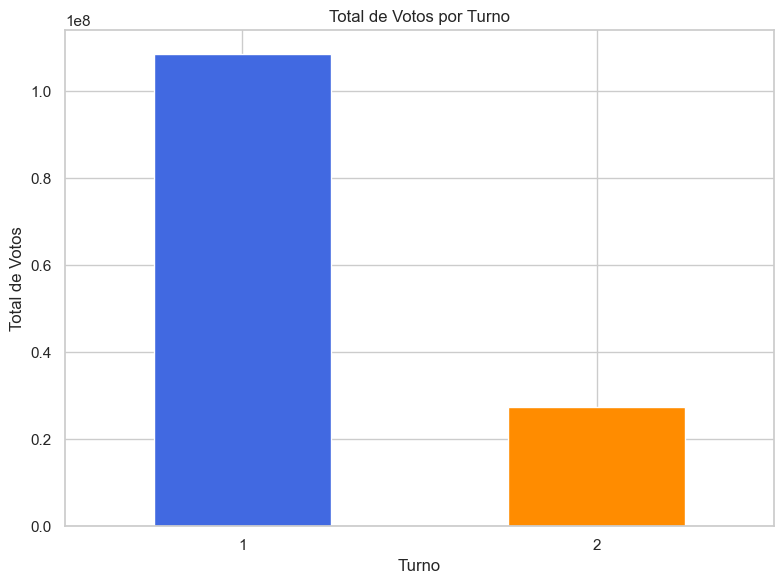

In [76]:
turnos = df.groupby('NR_TURNO')['QT_VOTOS'].sum()

turnos.plot(kind='bar', color=['royalblue', 'darkorange'], figsize=(8, 6))
plt.title("Total de Votos por Turno")
plt.xlabel("Turno")
plt.ylabel("Total de Votos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

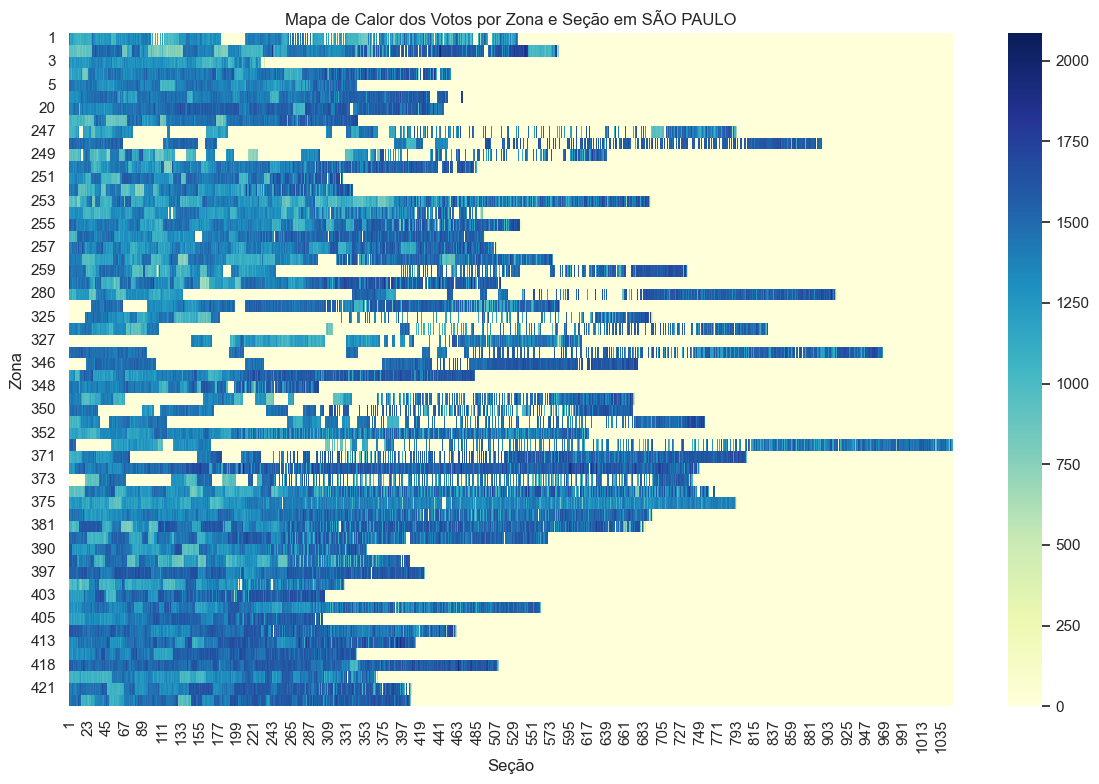

In [77]:
municipio = "SÃO PAULO" 
df_sp = df[df['NM_MUNICIPIO'] == municipio]

heatmap_data = df_sp.pivot_table(index='NR_ZONA', columns='NR_SECAO', values='QT_VOTOS', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title(f"Mapa de Calor dos Votos por Zona e Seção em {municipio}")
plt.xlabel("Seção")
plt.ylabel("Zona")
plt.tight_layout()
plt.show()